# 3253 Machine learning Group 3 Project 
## Analysis of Attrition in an Organization 

### Ahmed Soltan  , Taisa Maksymchuk , Nancy Gwany



## Why we thought about it ?

Our idea is to create a supervised model that will examine why an employee leaves a company ( target variable = employee left or not, some examples of attributes = satisfaction level, last evaluation, number of project, average monthly hours, time spent a company, work accidents, promotion in last 5 years, salary). 

We find this topic to be of particular interest for a few reasons. Firstly, not only is it important for an optimally functioning society to have employees with high company morale, it's of financial benefit for companies to retain employees. 

Based on research we found that employee turnover is one of the most important and challenging issues in human resource management (HRM; Armstrong, 2014). Accordingly, management scholars, experts, and industrial psychologists around the globe pay serious attention to employee
turnover. Companies have stated that suffering the financial costs from 90% to 200% of annual pay to replace employees that have left (cost depends on the level of employee that left). (Bryant & Allen, 2013)

This research will give insight to companies to improve turnover rate which will save money but also a byproduct will be increased productivity.


## Objective

Employee attrition and turnover is a big challenge for any organization. Human resource is now considered an asset which is way more important than technology and capital, among others. When an employee leaves, he or she takes with him/her :

1 - Learning and experience

2 - Contextual knowledge about the company and industry

Therefore it is very important for organizations to learn the reasons for employee turnover and take corrective action if required. However, to make strategies and policies which inhibit employee attrition, HR managers need to predict what kind of employees are vulnerable to leaving the company and then proactively take a retention action as and when needed.

Based on above considerations, our objective is to build a predictive model which can identify:

a) which profile of employees are vulnerable to attrition – “Who”

b) what features contribute to attrition – “Why”

## Source of data
This dataset contains data about 15,000 employees from an organization. Data was taken from Kaggle and it is a
machine learning dataset.



## 0. Import libraries & read data file

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from pandas.plotting import scatter_matrix
#from pandas.tools.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR_comma_sep.csv', header=0)

# 1. Data Profiling, Quality & Integrity Checks

Data profiling was done to ensure data quality and integrity. Contents of each field were analyzed for any anomalies and Null values. None we found.

In [3]:
data.shape

(14999, 10)

In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Check if any column has missing values ("False" = not missing - "True" = missing)
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

# 2. Data Preparation:

We enriched the data by adding additional derived attributes. In this regard, 6 calculated attributes were added to the data set as explained below:

1 - Utility
“Utility” represents how the company has utilized a resource during her/his tenure. Higher the number of projects involved per year of service, higher would be utilization.
This measure was calculated by diving “Number of projects” by “Time Spent in Company”.

2 - Throughput
“Throughput” represents how much output the resource has generated for the company. It essentially measures efficiency of the resource.
This measure was calculated by diving “Monthly Hours” by “Number of projects”.

Banded Categories for Continuous Variables
Treating the variable as continuous allows you to estimate the linear component of the relationship, but the categorical version allows you to capture much more complicated relationships. Therefore some of the continuous / numerical variables were split into three categorical bands so that we can have a categorical variable as well to represent these variables. 

The attributes for which additional calculated bands were added in dataset as new variables were:

3 - Utility Band

4 - Throughput Band

5 - Satisfaction Level Band

6 - Last Evaluation Band


In [8]:
data['utility'] = (data['number_project'] /data['time_spend_company'])
data['utility_band'] = pd.cut(data['utility'], 3)
data[['utility_band', 'left']].groupby(['utility_band']).mean()

,left
utility_band,
"(0.197, 1.3]",0.323112
"(1.3, 2.4]",0.144769
"(2.4, 3.5]",0.028986


In [9]:
data['throughput'] = (data['average_montly_hours'] * 12) /data['number_project']
data['throughput_band'] = pd.cut(data['throughput'], 3)
data[['throughput_band', 'left']].groupby(['throughput_band']).mean()

,left
throughput_band,
"(192.334, 749.333]",0.186359
"(749.333, 1304.667]",0.340725
"(1304.667, 1860.0]",0.098940


In [10]:
data['satisfaction_level_band'] = pd.cut(data['satisfaction_level'], 3)
data[['satisfaction_level_band', 'left']].groupby(['satisfaction_level_band']).mean()

,left
satisfaction_level_band,
"(0.0891, 0.393]",0.537221
"(0.393, 0.697]",0.190288
"(0.697, 1.0]",0.145010


In [11]:
data['last_evaluation_band'] = pd.cut(data['last_evaluation'], 3)
data[['last_evaluation_band', 'left']].groupby(['last_evaluation_band']).mean()

,left
last_evaluation_band,
"(0.359, 0.573]",0.374003
"(0.573, 0.787]",0.040160
"(0.787, 1.0]",0.298612


# 3. Exploratory Data Analysis

## 3.1 Exploratory Data Analysis of Overall Dataset

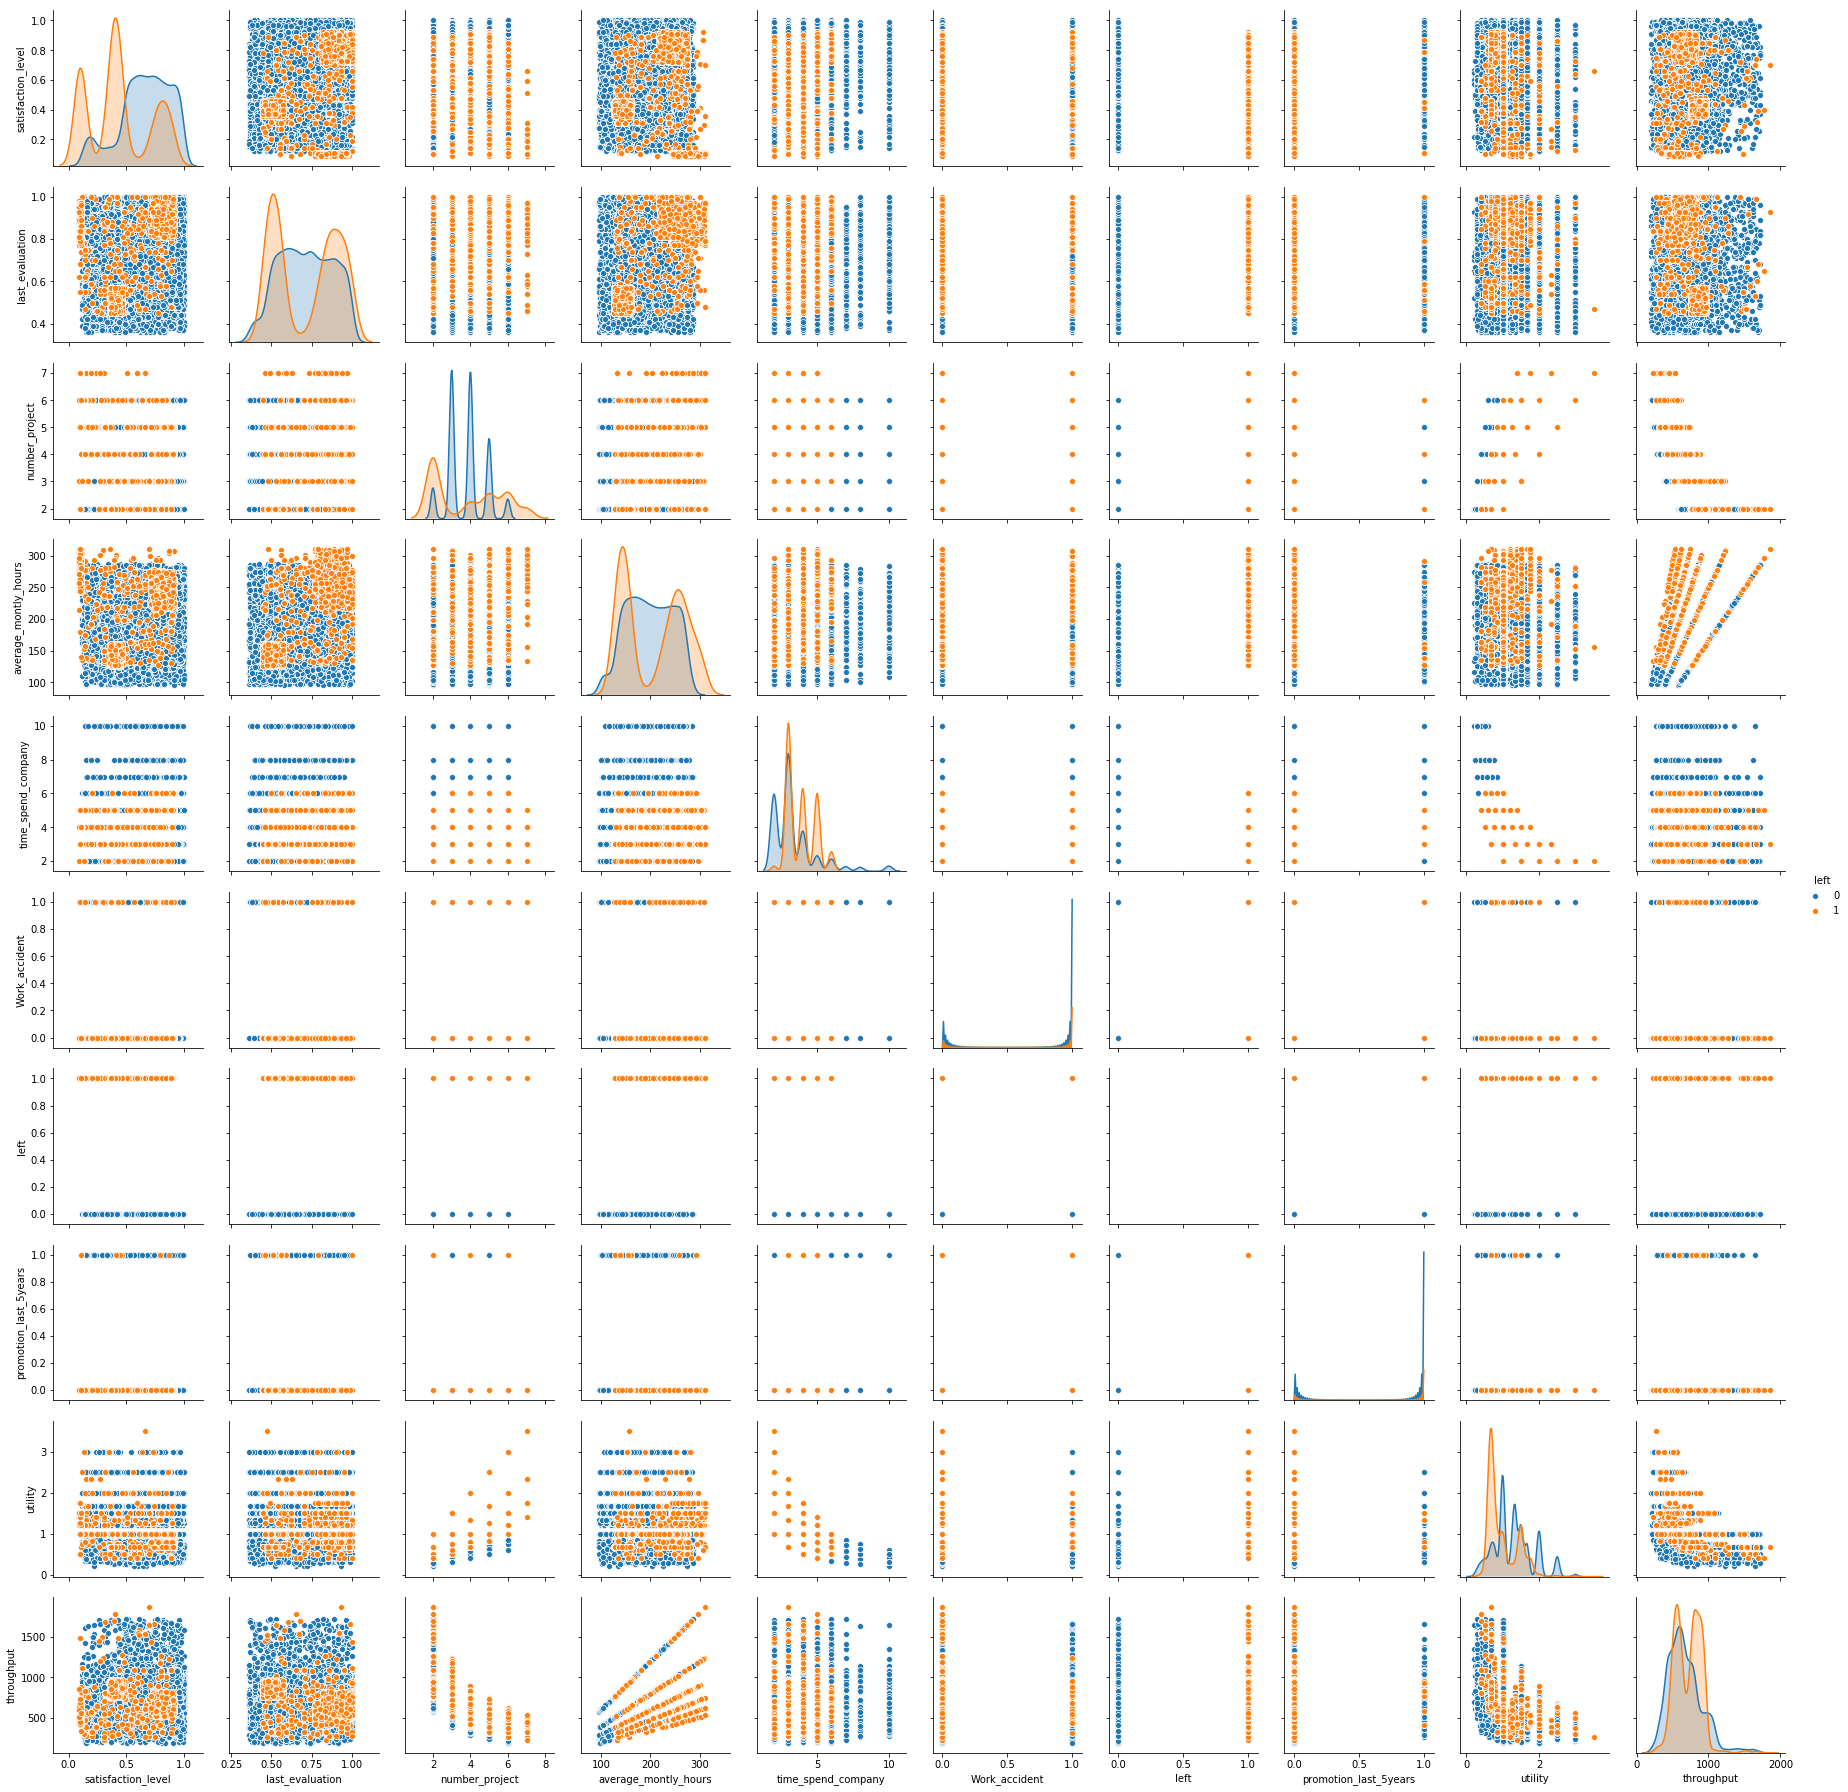

In [12]:
sns.pairplot(data, hue="left")

Pair plots show several variables exhibit a difference in trend between those who left the company vs those who stayed in the company.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,utility,throughput
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.084084,0.050456
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.147747,-0.128880
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.552551,-0.683385
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.181781,0.310253
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.582233,-0.090425
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.026786,-0.007117
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.253657,0.083889
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027752,-0.000518
utility,0.084084,0.147747,0.552551,0.181781,-0.582233,0.026786,-0.253657,-0.027752,1.000000,-0.441578
throughput,0.050456,-0.128880,-0.683385,0.310253,-0.090425,-0.007117,0.083889,-0.000518,-0.441578,1.000000


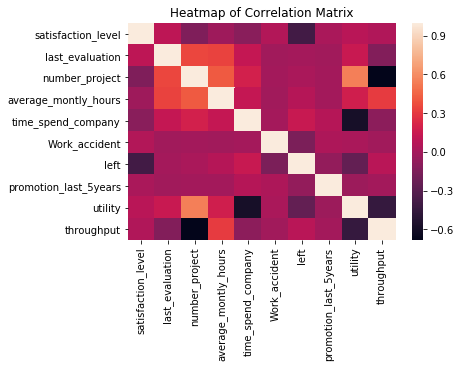

In [13]:
#Correlation Matrix
corr = data.corr()
corr = (corr)
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

Correlation heatmap and actual values are shown above. It shows that “time spend company” and “satisfaction_level” have the highest positive and negative correlation respectively.

Intuition and business knowledge would also support such a relationship indicating that as employees experience in company increases, there is a natural tendency to leave and inverse in case of satisfaction level of employees.

In [14]:
#Extract 'left' column, because 'left' is our target value
corr_left = pd.DataFrame(corr['left'].drop('left'))
corr_left.sort_values(by = 'left', ascending = False)

,left
time_spend_company,0.144822
throughput,0.083889
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
promotion_last_5years,-0.061788
Work_accident,-0.154622
utility,-0.253657
satisfaction_level,-0.388375


## 3.2 Exploratory Data Analysis of Category Variables - Base

Text(0.5,1,'Left over sales (barplot)')

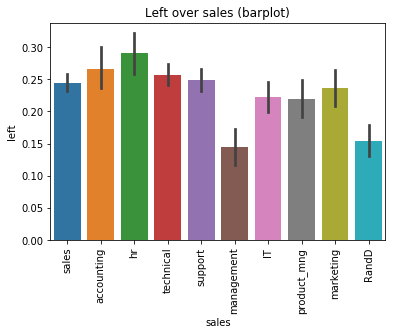

In [15]:
# "Sales" Variable
sns.barplot(x = 'sales', y = 'left', data = data)
plt.xticks(rotation=90)
plt.title('Left over sales (barplot)')

Text(0.5,1,'Left over salary (barplot)')

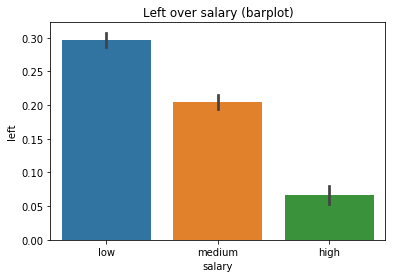

In [16]:
# "Salary" Variable
sns.barplot(x = 'salary', y = 'left', data = data)
plt.title('Left over salary (barplot)')

Text(0.5,1,'Left over promotion_last_5years (barplot)')

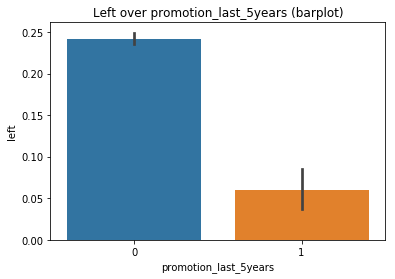

In [17]:
# "promotion_last_5years" Variable
sns.barplot(x = 'promotion_last_5years', y = 'left', data = data)
plt.title('Left over promotion_last_5years (barplot)')

Text(0,0.5,'Number of Observations')

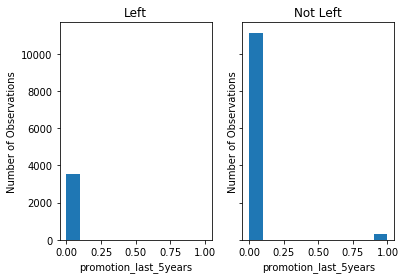

In [18]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)
axrrr[0].hist('promotion_last_5years', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('promotion_last_5years')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('promotion_last_5years', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('promotion_last_5years')
axrrr[1].set_ylabel('Number of Observations')

## 3.3 Exploratory Data Analysis of Category Variables - Derived (Calculated)

Text(0.5,1,'Left over last_evaluation_band (barplot)')

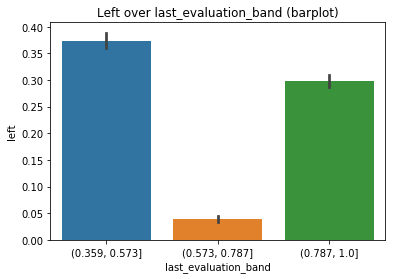

In [19]:
# "Last Evaluation Band" Variable
sns.barplot(x = 'last_evaluation_band', y = 'left', data = data)
plt.title('Left over last_evaluation_band (barplot)')

Text(0.5,1,'Left over satisfaction_level_band (barplot)')

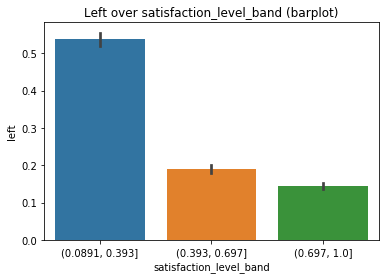

In [20]:
# "satisfaction_level_band" Variable
sns.barplot(x = 'satisfaction_level_band', y = 'left', data = data)
plt.title('Left over satisfaction_level_band (barplot)')

Text(0.5,1,'Left over throughput_band (barplot)')

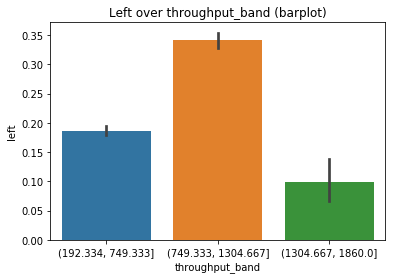

In [21]:
# "throughput_band" Variable
sns.barplot(x = 'throughput_band', y = 'left', data = data)
plt.title('Left over throughput_band (barplot)')

Text(0.5,1,'Left over utility_band (barplot)')

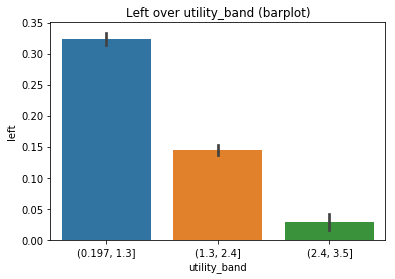

In [22]:
# "Utility Band" Variable
sns.barplot(x = 'utility_band', y = 'left', data = data)
plt.title('Left over utility_band (barplot)')

## 3.4 Exploratory Data Analysis of Numeric Variables - Base

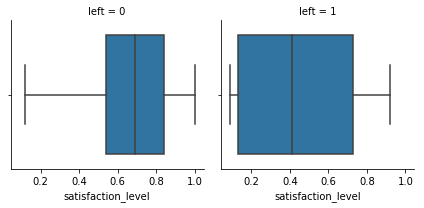

In [23]:
#satisfaction_level
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'satisfaction_level')

Text(0,0.5,'Number of Observations')

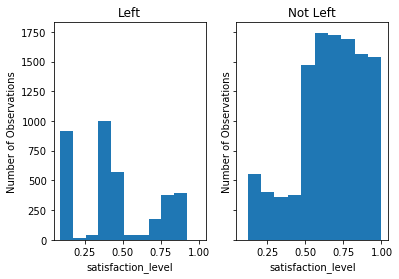

In [24]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)
axrrr[0].hist('satisfaction_level', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('satisfaction_level')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('satisfaction_level', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('satisfaction_level')
axrrr[1].set_ylabel('Number of Observations')

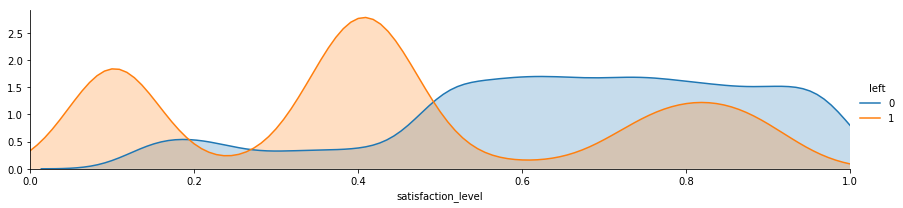

In [25]:
g = sns.FacetGrid(data, hue="left",aspect=4)
g.map(sns.kdeplot,'satisfaction_level',shade= True)
g.set(xlim=(0, data['satisfaction_level'].max()))
g.add_legend()

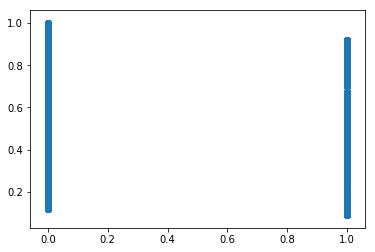

In [26]:
plt.scatter( data.left,data.satisfaction_level, marker="o")
plt.show()

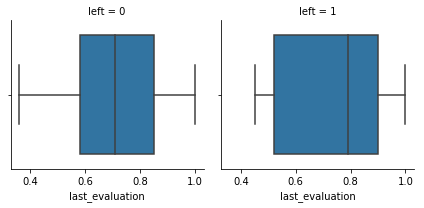

In [27]:
#last_evaluation
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'last_evaluation')

Text(0,0.5,'Number of Observations')

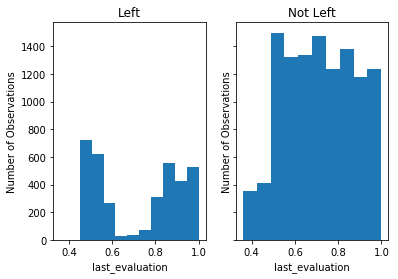

In [28]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)
axrrr[0].hist('last_evaluation', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('last_evaluation')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('last_evaluation', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('last_evaluation')
axrrr[1].set_ylabel('Number of Observations')

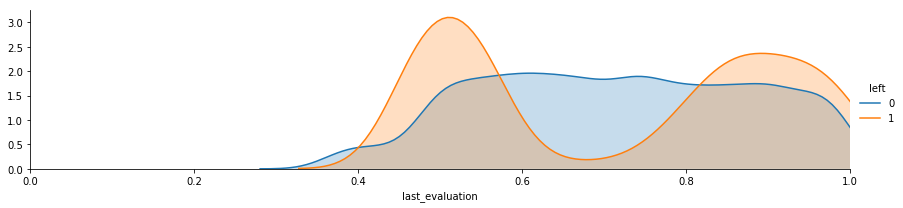

In [29]:
g = sns.FacetGrid(data, hue="left",aspect=4)
g.map(sns.kdeplot,'last_evaluation',shade= True)
g.set(xlim=(0, data['last_evaluation'].max()))
g.add_legend()

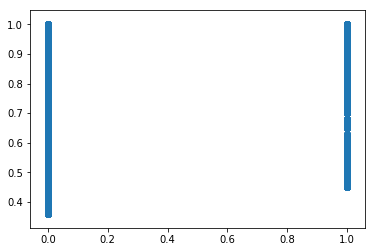

In [30]:
plt.scatter( data.left,data.last_evaluation, marker="o")
plt.show()

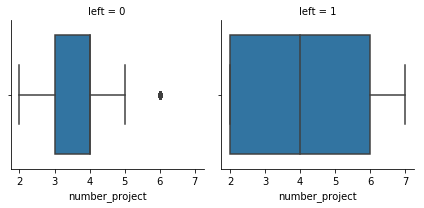

In [31]:
#number_project
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'number_project')

Text(0,0.5,'Number of Observations')

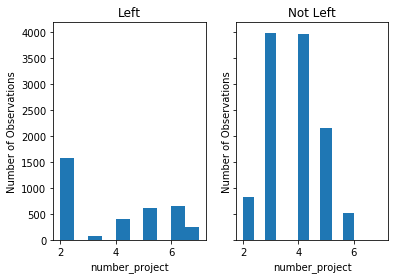

In [32]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)
axrrr[0].hist('number_project', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('number_project')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('number_project', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('number_project')
axrrr[1].set_ylabel('Number of Observations')

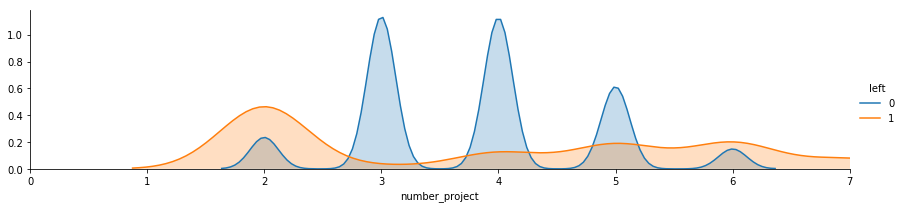

In [33]:
g = sns.FacetGrid(data, hue="left",aspect=4)
g.map(sns.kdeplot,'number_project',shade= True)
g.set(xlim=(0, data['number_project'].max()))
g.add_legend()

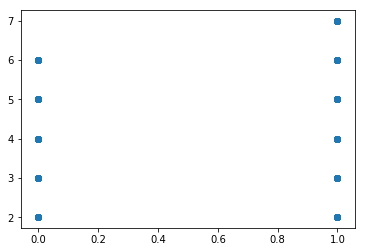

In [34]:
plt.scatter( data.left,data.number_project, marker="o")
plt.show()

## 3.5 Exploratory Data Analysis of Numerical Variables - Derived (Calculated)

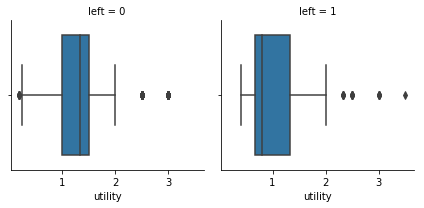

In [35]:
# "utility" Variable
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'utility')

Text(0,0.5,'Number of Observations')

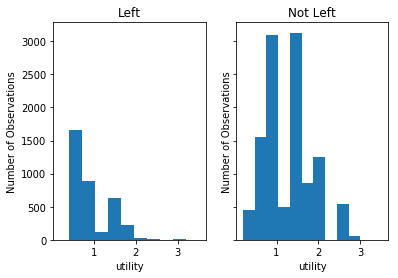

In [36]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)
axrrr[0].hist('utility', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('utility')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('utility', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('utility')
axrrr[1].set_ylabel('Number of Observations')

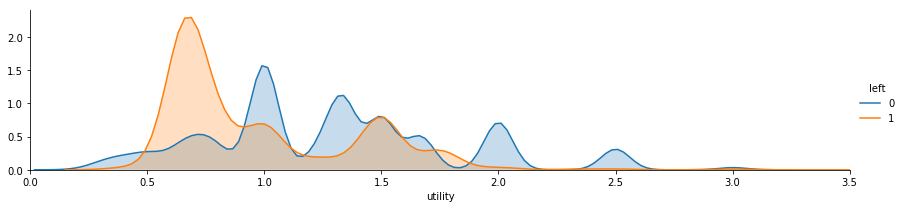

In [37]:
g = sns.FacetGrid(data, hue="left",aspect=4)
g.map(sns.kdeplot,'utility',shade= True)
g.set(xlim=(0, data['utility'].max()))
g.add_legend()

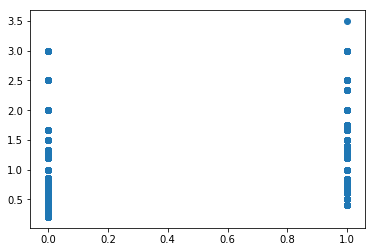

In [38]:
plt.scatter( data.left,data.utility, marker="o")
plt.show()

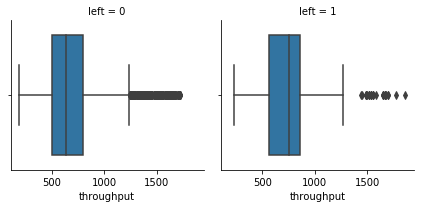

In [39]:
#throughput
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'throughput')

Text(0,0.5,'Number of Observations')

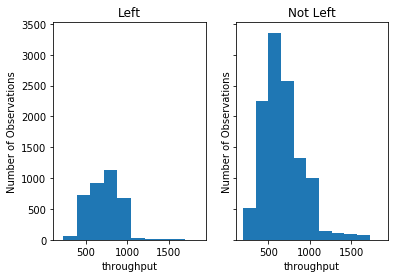

In [40]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)
axrrr[0].hist('throughput', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('throughput')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('throughput', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('throughput')
axrrr[1].set_ylabel('Number of Observations')

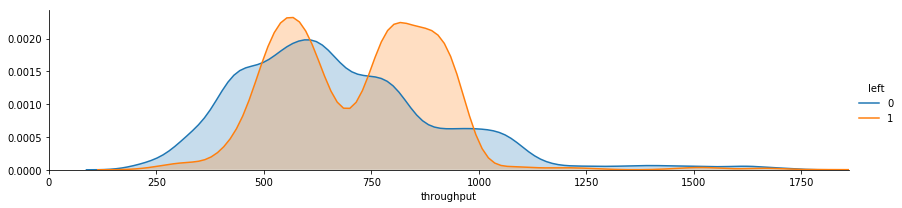

In [41]:
g = sns.FacetGrid(data, hue="left",aspect=4)
g.map(sns.kdeplot,'throughput',shade= True)
g.set(xlim=(0, data['throughput'].max()))
g.add_legend()

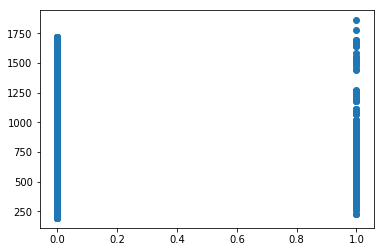

In [42]:
plt.scatter( data.left,data.throughput, marker="o")
plt.show()

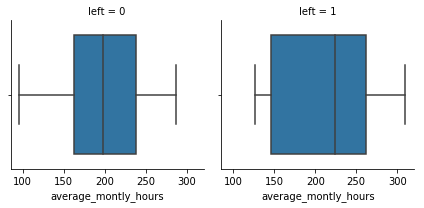

In [43]:
#average_montly_hours
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'average_montly_hours')

Text(0,0.5,'Number of Observations')

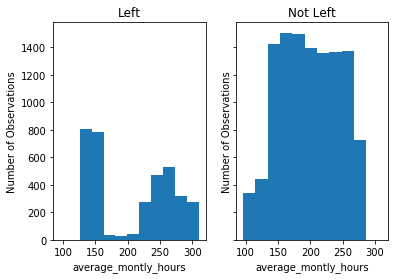

In [44]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)
axrrr[0].hist('average_montly_hours', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('average_montly_hours')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('average_montly_hours', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('average_montly_hours')
axrrr[1].set_ylabel('Number of Observations')

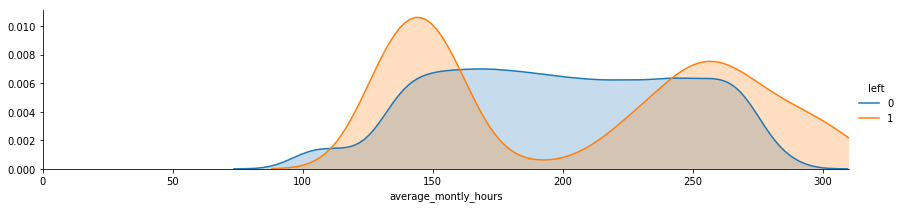

In [45]:
g = sns.FacetGrid(data, hue="left",aspect=4)
g.map(sns.kdeplot,'average_montly_hours',shade= True)
g.set(xlim=(0, data['average_montly_hours'].max()))
g.add_legend()

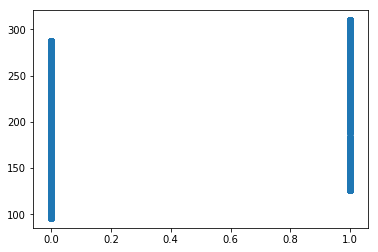

In [46]:
plt.scatter( data.left,data.average_montly_hours, marker="o")
plt.show()

## 3.6 Modelling

In [47]:
#First check what string values are
data['sales'].unique(),data['salary'].unique(),data['last_evaluation_band'].unique(),
data['satisfaction_level_band'].unique(),data['throughput_band'].unique(),
data['utility_band'].unique()

[(0.197, 1.3], (1.3, 2.4], (2.4, 3.5]]
Categories (3, interval[float64]): [(0.197, 1.3] < (1.3, 2.4] < (2.4, 3.5]]

In [48]:
# Clasify the attributes
cat_attrib = ['sales', 'salary','last_evaluation_band','satisfaction_level_band',
'throughput_band','utility_band']
num_attrib = ['utility','throughput','satisfaction_level', 'last_evaluation',
'number_project','average_montly_hours', 'time_spend_company',
'Work_accident', 'promotion_last_5years']
ignored_attrib = ['sales']
target_attrib = ['left']

In [49]:
# Create label encoders for categorical features
for var in cat_attrib:
    number = LabelEncoder()
    data[var] = number.fit_transform(data[var].astype('str'))

In [50]:
# Define the list of features
features = list(set(list(data.columns)) - set(target_attrib) - set(ignored_attrib))

In [51]:
# Show list of features
features

['utility',
 'satisfaction_level',
 'satisfaction_level_band',
 'number_project',
 'time_spend_company',
 'throughput',
 'throughput_band',
 'average_montly_hours',
 'last_evaluation_band',
 'salary',
 'promotion_last_5years',
 'last_evaluation',
 'utility_band',
 'Work_accident']

In [52]:
# Define training and test set for each classifier
train = data.sample(frac=0.7)
test_RandomForest = data.loc[~data.index.isin(train.index)]
test_KNN = data.loc[~data.index.isin(train.index)]
test_GBC = data.loc[~data.index.isin(train.index)]
test_DCT = data.loc[~data.index.isin(train.index)]
test_GNB = data.loc[~data.index.isin(train.index)]
test_LGR = data.loc[~data.index.isin(train.index)]
test_LNR = data.loc[~data.index.isin(train.index)]

### 1 - Random Forest

In [53]:
# Train Random Forest model
model_RandomForest = RandomForestClassifier(n_estimators=65,criterion='gini',
max_depth=5, max_features=0.5,
random_state=600)
model_RandomForest.fit(train[features],train['left'])
model_RandomForest_score_train = model_RandomForest.score(train[features],
train['left'])
print("Training score = ",model_RandomForest_score_train)
model_RandomForest_score_test = model_RandomForest.score(test_RandomForest[features],
test_RandomForest['left'])
print("Testing score = ", model_RandomForest_score_test)
# Predict RandomForest data and store on final .csv file
test_RandomForest['Predicted'] = model_RandomForest.predict(test_RandomForest[features])
test_RandomForest.to_csv('attrition-RF-prediction.csv', sep=',', index=False)

Training score =  0.9782836460615296
Testing score =  0.9773333333333334


### 2 - KNN

In [54]:
# Train KNN model
model_KNN = KNeighborsClassifier()
model_KNN.fit(train[features],train['left'])
model_KNN_score_train = model_KNN.score(train[features],train['left'])
print("Training score = ",model_KNN_score_train)
model_KNN_score_test = model_KNN.score(test_KNN[features],test_KNN['left'])
print("Testing score = ", model_KNN_score_test)
# Predict KNN data and store on final .csv file
test_KNN['Predicted'] = model_KNN.predict(test_KNN[features])
test_KNN.to_csv('attrition-KNN-prediction.csv', sep=',', index=False)

Training score =  0.9550433374607106
Testing score =  0.9377777777777778


### 3 - GBC

In [55]:
# Train GBC model
model_GBC = GradientBoostingClassifier()
model_GBC.fit(train[features],train['left'])
model_GBC_score_train = model_GBC.score(train[features],train['left'])
print("Training score = ",model_GBC_score_train)
model_GBC_score_test = model_GBC.score(test_GBC[features],test_GBC['left'])
print("Testing score = ", model_GBC_score_test)
# Predict GBC data and store on final .csv file.\
test_GBC['Predicted'] = model_GBC.predict(test_GBC[features])
test_GBC.to_csv('attrition-GBC-prediction.csv', sep=',', index=False)

Training score =  0.9780931517287361
Testing score =  0.9771111111111112


### 4 - Decision Tree

In [56]:
# Train DCT model
model_DCT = DecisionTreeClassifier()
model_DCT.fit(train[features],train['left'])
model_DCT_score_train = model_DCT.score(train[features],train['left'])
print("Training score = ",model_DCT_score_train)
model_DCT_score_test = model_DCT.score(test_DCT[features],test_DCT['left'])
print("Testing score = ", model_DCT_score_test)
# Predict DCT data and store on final .csv file
test_DCT['Predicted'] = model_DCT.predict(test_DCT[features])
test_DCT.to_csv('attrition-DCT-prediction.csv', sep=',', index=False)

Training score =  1.0
Testing score =  0.98


### 5 - GNB

In [57]:
# Train GNB model
model_GNB = GaussianNB()
model_GNB.fit(train[features],train['left'])
model_GNB_score_train = model_GNB.score(train[features],train['left'])
print("Training score = ",model_GNB_score_train)
model_GNB_score_test = model_GNB.score(test_GNB[features],test_GNB['left'])
print("Testing score = ", model_GNB_score_test)
# Predict GNB data and store on final .csv file
test_GNB['Predicted'] = model_GNB.predict(test_GNB[features])
test_GNB.to_csv('attrition-GNB-prediction.csv', sep=',', index=False)

Training score =  0.7721687779788551
Testing score =  0.7704444444444445


### 6 - Logistic Regression

In [58]:
# Train Logistic Regression model
model_LGR = LogisticRegression()
model_LGR.fit(train[features],train['left'])
model_LGR_score_train = model_LGR.score(train[features],train['left'])
print("Training score = ",model_LGR_score_train)
model_LGR_score_test = model_LGR.score(test_LGR[features],test_LGR['left'])
print("Testing score = ", model_LGR_score_test)
# Predict GNB data and store on final .csv file
test_LGR['Predicted'] = model_LGR.predict(test_LGR[features])
test_LGR.to_csv('attrition-LGR-prediction.csv', sep=',', index=False)

Training score =  0.868273168873226
Testing score =  0.8742222222222222


### 7 - Linear Regression

In [59]:
# Train Linear Regression model
model_LNR = LinearRegression()
model_LNR.fit(train[features],train['left'])
model_LNR_score_train = model_LNR.score(train[features],train['left'])
print("Training score = ",model_LNR_score_train)
model_LNR_score_test = model_LNR.score(test_LNR[features],test_LNR['left'])
print("Testing score = ", model_LNR_score_test)
# Predict GNB data and store on final .csv file
test_LNR['Predicted'] = model_LNR.predict(test_LNR[features])
test_LNR.to_csv('attrition-LNR-prediction.csv', sep=',', index=False)

Training score =  0.31794715589875155
Testing score =  0.3319057629596382


### Confusion Matrix

[[3389   16]
 [  86 1009]]


Text(0.5,1.05,'Random Forest\n')

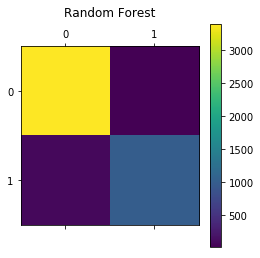

In [60]:
# Confusion Matrix for Random Forest:
RF_conf_matrix = confusion_matrix(test_RandomForest['left'],
test_RandomForest['Predicted'])
print (RF_conf_matrix)
plt.matshow(RF_conf_matrix)
plt.colorbar()
plt.title('Random Forest\n')

[[3389   16]
 [  86 1009]]


Text(0.5,1.05,'K-Nearest Neighbours\n')

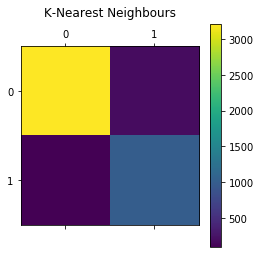

In [61]:
# Confusion Matrix for KNN:
KNN_conf_matrix = confusion_matrix(test_KNN['left'], test_KNN['Predicted'])
print (RF_conf_matrix)
plt.matshow(KNN_conf_matrix)
plt.colorbar()
plt.title('K-Nearest Neighbours\n')

[[3380   25]
 [  78 1017]]


Text(0.5,1.05,'Gradient Boosting Classifier\n')

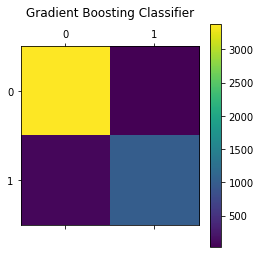

In [62]:
# Confusion Matrix for GBC:
GBC_conf_matrix = confusion_matrix(test_GBC['left'], test_GBC['Predicted'])
print (GBC_conf_matrix)
plt.matshow(GBC_conf_matrix)
plt.colorbar()
plt.title('Gradient Boosting Classifier\n')

[[3343   62]
 [  28 1067]]


Text(0.5,1.05,'Decision Tree Classifier\n')

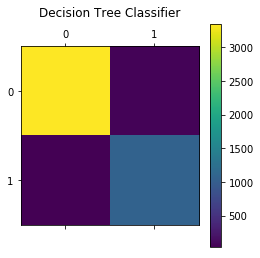

In [63]:
# Confusion Matrix for DCT:
DCT_conf_matrix = confusion_matrix(test_DCT['left'], test_DCT['Predicted'])
print (DCT_conf_matrix)
plt.matshow(DCT_conf_matrix)
plt.colorbar()
plt.title('Decision Tree Classifier\n')

[[2634  771]
 [ 262  833]]


Text(0.5,1.05,'Gaussian Naive Bayes\n')

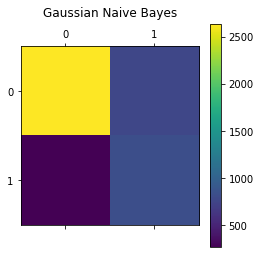

In [64]:
# Confusion Matrix for GNB:
GNB_conf_matrix = confusion_matrix(test_GNB['left'], test_GNB['Predicted'])
print (GNB_conf_matrix)
plt.matshow(GNB_conf_matrix)
plt.colorbar()
plt.title('Gaussian Naive Bayes\n')

[[3187  218]
 [ 348  747]]


Text(0.5,1.05,'Logistic Regression\n')

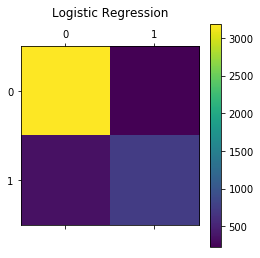

In [65]:
# Confusion Matrix for Logistic Regression:
RF_conf_matrix = confusion_matrix(test_LGR['left'], test_LGR['Predicted'])
print (RF_conf_matrix)
plt.matshow(RF_conf_matrix)
plt.colorbar()
plt.title('Logistic Regression\n')

Last step of modelling is to build a confusion matrix for each model to determine difference in stability and accuracy of each algorithm. it shows that Random forest has very low False Positive but Decision Tree has the lowest False Negative rate. 

A false positive would mean that an employee who is not leaving has been marked at risk of attrition whereas a false negative means that an employee has been marked as safe but would actually leave. This means that depending on the objective of a company, it can decide whether it gives higher priority to False positives or False negatives and select a model accordingly.

## Summary Report

In [66]:
print ("=============================================================")
print (" Summary Report ")
print ("=============================================================\n")
print ("Total number of instances in dataset:", data.shape[0])
print ("Ratio between training and test:", 0.7)
print ("Number of instances in training dataset:", len(train.index))
print ("Number of instances in test dataset:", len(test_RandomForest.index))
print ("\n")
print ("Missing values in the dataset:")
print (data.isnull().any())
print ("\n")
print ("List of features:")
print (features)
print ("\n")
print ("=============================================================")
print (" MODELS SCORE")
print ("-------------------------------------------------------------")
#Model comparison
models = pd.DataFrame({
'Model' : ['Random Forest','kNN','GBC','Decision Tree',
'GNB','Logistic Regression','Linear Regression'],
'Training_Score' : [model_RandomForest_score_train, model_KNN_score_train,
model_GBC_score_train, model_DCT_score_train,
model_GNB_score_train,model_LGR_score_train,
model_LNR_score_train],
'Testing_Score' : [model_RandomForest_score_test, model_KNN_score_test,
model_GBC_score_test, model_DCT_score_test,
model_GNB_score_test,model_LGR_score_test,
model_LNR_score_train]})
models.sort_values(by='Testing_Score', ascending=False)

 Summary Report 

Total number of instances in dataset: 14999
Ratio between training and test: 0.7
Number of instances in training dataset: 10499
Number of instances in test dataset: 4500


Missing values in the dataset:
satisfaction_level         False
last_evaluation            False
number_project             False
average_montly_hours       False
time_spend_company         False
Work_accident              False
left                       False
promotion_last_5years      False
sales                      False
salary                     False
utility                    False
utility_band               False
throughput                 False
throughput_band            False
satisfaction_level_band    False
last_evaluation_band       False
dtype: bool


List of features:
['utility', 'satisfaction_level', 'satisfaction_level_band', 'number_project', 'time_spend_company', 'throughput', 'throughput_band', 'average_montly_hours', 'last_evaluation_band', 'salary', 'promotion_last_5years', 'l

,Model,Training_Score,Testing_Score
3,Decision Tree,1.000000,0.980000
0,Random Forest,0.978284,0.977333
2,GBC,0.978093,0.977111
1,kNN,0.955043,0.937778
5,Logistic Regression,0.868273,0.874222
4,GNB,0.772169,0.770444
6,Linear Regression,0.317947,0.317947


# 4. Pipeline

### 1-PipeLine pre-processing

In [67]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [68]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrib)),
    ('scaler', StandardScaler())
])

In [69]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrib)),
    ('onehotencoder', OneHotEncoder(sparse = False))
])

In [70]:
#Make a complete pipeline by joining the two pipelines using FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

###### Splitting data into training and testing sets

In [71]:
train_set, test_set = train_test_split(data, test_size = 0.3, random_state = 42)

In [72]:
# Make a copy of the original sourcefile
hr_analytics = train_set.copy()

In [73]:
#Transformation Pipeline
hr_analytics_prepared = preprocess_pipeline.fit_transform(hr_analytics)
hr_analytics_prepared

array([[ 1.05130688, -1.11832935, -2.062054  , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24016961, -0.97264193, -0.17575764, ...,  0.        ,
         1.        ,  0.        ],
       [-1.05765003,  1.04083293, -0.89816901, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 2.51135398, -0.38167398,  0.18544805, ...,  0.        ,
         0.        ,  1.        ],
       [-0.7980861 , -0.13587315,  0.70718959, ...,  1.        ,
         0.        ,  0.        ],
       [-1.38210494,  2.7405195 ,  1.46973493, ...,  1.        ,
         0.        ,  0.        ]])

In [74]:
hr_analytics = train_set.drop('left', axis = 1)
hr_analytics_labels = train_set.iloc[:, 6].copy()

### 2-Building Machine Learning Models

In [75]:
#Random Forest Classifier
forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
forest_scores.mean()

0.986379590539743

In [76]:
#KNN
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
knn_scores.mean()

0.9549477506922693

In [77]:
# GBC
GBC_clf = GradientBoostingClassifier()
GBC_scores = cross_val_score(GBC_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
GBC_scores.mean()

0.9779980934223069

In [78]:
#Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
tree_scores.mean()

0.9762835353397795

In [79]:
# GNB
GNB_clf = GaussianNB()
GNB_scores = cross_val_score(GNB_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
GNB_scores.mean()

0.7663578010803941

In [80]:
#Logistic Regression
log_clf = LogisticRegression()
log_scores = cross_val_score(log_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
log_scores.mean()

0.9094217622225248

In [81]:
#Linear Regression
lnr_clf = LinearRegression()
lnr_scores = cross_val_score(lnr_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
lnr_scores.mean()

0.3980124456902669

### 3- Conclusion:

In [82]:
algorithm = pd.DataFrame({
    'Algorithm': ['Random Forest Classifier', 'KNN Classifier', 'Gradient Boosting Classifier', 'Decision Tree Classifier', 'Gaussian NB', 'Logistic Regression', 'LinearRegression'],
    'Score': [forest_scores.mean(), knn_scores.mean(), GBC_scores.mean(), tree_scores.mean(), GNB_scores.mean(), log_scores.mean(), lnr_scores.mean()]
})
algorithm.sort_values(by = 'Score', ascending=True)

,Algorithm,Score
6,LinearRegression,0.398012
4,Gaussian NB,0.766358
5,Logistic Regression,0.909422
1,KNN Classifier,0.954948
3,Decision Tree Classifier,0.976284
2,Gradient Boosting Classifier,0.977998
0,Random Forest Classifier,0.986380


###### Based on our results,  Random Forest shows the highest mean score.

## 5. Fine-tuning

In [83]:
param_grid = [
    {'n_estimators': [100, 200, 500]},
    {'criterion': ['gini', 'entropy']},
    {'max_features': ['auto', 'sqrt', 'log2']}
]

In [84]:
grid_search = GridSearchCV(forest_clf, param_grid, cv = 10, verbose = 3)

In [85]:
grid_search.fit(hr_analytics_prepared, hr_analytics_labels)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9895238095238095, total=   1.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ....... n_estimators=100, score=0.9885714285714285, total=   1.1s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ....... n_estimators=100, score=0.9876190476190476, total=   1.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9847619047619047, total=   1.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9857142857142858, total=   1.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9904761904761905, total=   1.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9895238095238095, total=   1.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9923809523809524, total=   1.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9914285714285714, total=   1.0s
[CV] n_estimators=100 ................................................
[CV] .

[CV] ...... max_features=sqrt, score=0.9847619047619047, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.9866666666666667, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.9828571428571429, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.9838095238095238, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.9866666666666667, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.9885714285714285, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.9876190476190476, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 200, 500]}, {'criterion': ['gini', 'entropy']}, {'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [86]:
grid_search.best_params_

{'n_estimators': 100}

In [87]:
grid_search.best_score_

0.9891418230307648

In [88]:
forest_clf = RandomForestClassifier(n_estimators = 100)
forest_scores = cross_val_score(forest_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
forest_scores.mean()

0.9892372781333696

In [89]:
hr_test_prepared = preprocess_pipeline.transform(test_set)
hr_test_prepared

array([[ 2.51135398, -0.622245  ,  0.14531408, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.56462452, -0.09229145,  1.06839528, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56462452,  0.74447732,  0.30584994, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.40874021, -0.26661827,  0.66705563, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.51135398, -0.49672969,  1.2690651 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.56462452,  1.30232317,  0.10518012, ...,  0.        ,
         1.        ,  0.        ]])

In [90]:
hr_test_labels = test_set.iloc[:, 6].copy()

In [91]:
forest_clf.fit(hr_analytics_prepared, hr_analytics_labels)

y_pred = forest_clf.predict(hr_test_prepared)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
accuracy_score(hr_test_labels, y_pred)

0.9873333333333333

## Conclusion

###### Using Pipeline we decided Random Forest is the best model for prediction and it increase score of our model to 98,7%.

# Findings 

Based on analysis, findings and observations in previous sections, we can summarize our conclusions as follows:

### 1 - Departmental Management Policies (represented by “sales”):
It seems that “HR” and “Accounting” department have relatively high attrition rate whereas in contrast “management” and “R&D” have much lower attrition rates. The company should review management and leadership style of high attrition rate departments and perhaps ask these departments to deploy practices of better departments (like R&D department). Cross departmental learning can improve attrition rates of company on overall basis.

### 2- Employee performance (represented by Last evaluation band):
Low and High performers (low evaluation band and high evaluation band) tend to be more prone to attrition as compared to medium performers. This should be concerning for a company since good employees have a tendency to leave.

### 3- Salary
We can conclude that higher the salary; lower the attrition. This is quite intuitive as well but on this issue, it is not possible for any company to increase salary of everyone. However selective salary rationalization can be done for high risk, high performance employees.

### 4 - Promotion
This is quite similar to Salary mentioned above. Promotion is inversely related to attrition however just like salary, a company has to be selective about which employees should be given a promotion to improve retention.

### 5 - Satisfaction
This variable shows that lower the satisfaction, higher the attrition. This again is intuitive finding and to increase employee satisfaction, a company can use difference levers of influence (job enrichment, trainings, etc). 

### 6 - Utilization (represented by “Utility”)
It was observed that, lower the utilization higher the attrition. This means that a company should rationalize the amount of work each employee is assigned. If someone is under utilized, there is a tendency for employees to leave the company.

### 7- Throughout (represented by “Throughput”)
Last key finding was that higher throughput is showing some relation with attrition. This essentially means that those employees who work a lot have a higher risk of leaving. This could be due to a burnout phenomenon and would require the company to rationalize the workload. If we read this in conjunction with “Utilization”, it further proves that workload balancing is definitely a recommended approach.


## Recommendations

### 1 - Use Prediction Models to identify employees at risk
Use prediction models on recurring basis to identify highest attrition risk employees.

### 2 - Build an Employee Retention Strategy
Develop a retention strategy using aforementioned levers of influence (under conclusions) to plan an offer for each employee differently, depending on employment record and employee preferences. For example, we can easily propose:

1 - Balance workload for an employee by ensuring she/he is neither underworked nor over worked

2 - Promotion for those employees who are high performers and company would prefer to retain them at higher cost

3 - Job enrichment by giving a challenging job and which will help build someone capabilities and skills.

4 - Salary rationalization for those employees who are good performers and company would like to retain them at higher cost

5 - Training can be offered to employees to increase their job satisfaction